In [17]:
# -*- coding: UTF-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from howplot import *




def parseFile(input_file : str):
    """
    解析文件，返回数据列表
    数据格式为
    '[6207710, 6207364, 62..]'
    '[6207710, 6207364, 62..]'
    '[6207710, 6207364, 62..]'
    '[6207710, 6207364, 62..]'
    第一行 是 iter_ground_truth
    第二行 是 iter_estimate
    第三行 是 comm_ground_truth
    第四行 是 comm_estimate
    输出各自的相对误差
    """
    with open(input_file, 'r') as file:
        lines = file.readlines()
    if len(lines) != 4:
        print("文件格式错误")
        return None
    # 要注意，数据的格式 带有中括号，首先要去除每一行的中括号
    lines = [line.strip()[1:-1] for line in lines]
    iter_ground_truth = [int(x) for x in lines[0].strip().split(',')]
    iter_estimate = [int(x) for x in lines[1].strip().split(',')]
    comm_ground_truth = [int(x) for x in lines[2].strip().split(',')]
    comm_estimate = [int(x) for x in lines[3].strip().split(',')]
    # compute = iter - comm
    comp_ground_truth = [iter_ground_truth[i] - comm_ground_truth[i] for i in range(len(iter_ground_truth))]
    comp_estimate = [iter_estimate[i] - comm_estimate[i] for i in range(len(iter_estimate))]
   
    # 计算相对误差
    err_iter = [abs(iter_estimate[i] - iter_ground_truth[i]) / iter_ground_truth[i] for i in range(len(iter_ground_truth))]
    err_comm = [abs(comm_estimate[i] - comm_ground_truth[i]) / comm_ground_truth[i] for i in range(len(comm_ground_truth))]
    err_comp = [abs(comp_estimate[i] - comp_ground_truth[i]) / comp_ground_truth[i] for i in range(len(comp_ground_truth))]
    
    return [err_iter, err_comm, err_comp]



def plotBox(input_dats : list, fname :str):
    """
    绘制箱型图
    """
    
    if len(input_dats) != 3:
        print("输入数据格式有误")
        return

    # 组合数据（每个列表对应一个箱型图）
    data = [dat for dat in input_dats]

    # 创建画布
    plt.figure()

    # 绘制箱型图
    box = plt.boxplot(
        data,
        patch_artist=True,  # 允许填充颜色
        labels=["迭代时间", "通讯时间", "计算时间"],  # 横轴标签
        widths=0.5,        # 箱体宽度
        showfliers=True    # 显示异常值
    )

    # 自定义颜色（可选）
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    
    # 添加标题和标签, 加粗
    plt.ylabel("相对误差",  fontdict={
              'fontsize': 18,
              'fontweight': 'bold'
    })

    # 显示图形
    plt.savefig('figs/' + fname + '.pdf')

/tmp/ipykernel_16852/616247862.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


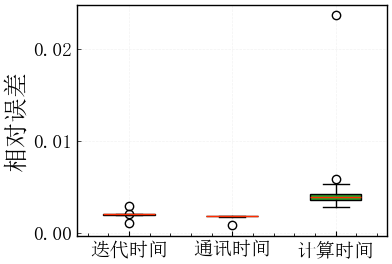

In [18]:

plt.rcParams.update(line_params)
plt.rcParams['font.family'] = 'simsun'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


fname = 'data/gpt13B.dat'

datas = parseFile(fname)

plotBox(datas, 'gpt13B_error')

/tmp/ipykernel_16852/616247862.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


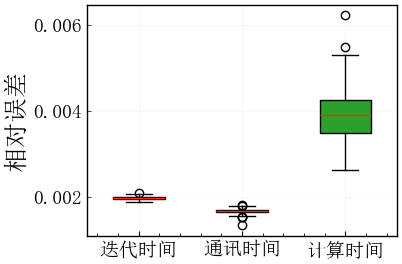

In [15]:

fname = 'data/llama8B.dat'

datas = parseFile(fname)

plotBox(datas, 'llama8B_error')

/tmp/ipykernel_16852/616247862.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


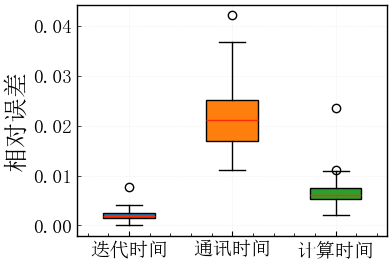

In [16]:

fname = 'data/small.dat'

datas = parseFile(fname)

plotBox(datas, 'small_error')